<br/>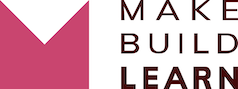<br/><br/>
<center style="color:#888">Visualización de datos</center>
<center style="color:#aaa; margin-top:10px;"><b>Prof. Óscar Fernández Angulo</b><br>oscarfa@faculty.mioti.es</center>
<p style="font-size: 2.5em; text-align:center">Challenge S5: Cerveza y StackOverflow</p><br/>

# Consideraciones previas

* Cada ejercicio se responderá con una sola figura y, si se considera necesario, un texto comentando los resultados.
* No existe una única respuesta correcta. 
* Se valorará positivamente usar diferentes tipos de gráficos durante el Challenge. Si no se repite ninguno, mejor.
* Los ejercicios están pensados para responderse con los conocimientos obtenidos en cualquiera de los Worksheets presentados hasta la fecha.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import datetime
import math
from scipy import stats, interpolate
from sklearn import linear_model


# Seleccionamos un tamaño de letra que se pueda leer.
matplotlib.rcParams.update({'font.size': 14})

# Primera parte: Cervezas

Comenzamos el *Challenge* con un dataset sobre cervezas [Brewer's Friend Beer Recipes](https://www.kaggle.com/jtrofe/beer-recipes) (recipeData.csv). En él podemos encontrar diferentes medidas sobre recetas de cerveza artesanal.

In [4]:
# El CSV está en formato 'latin-1', así que habrá que importarlo de la siguiente manera:
beer_df = pd.read_csv("./beer.csv", encoding='latin-1')

In [5]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         73861 non-null  int64  
 1   Name           73860 non-null  object 
 2   URL            73861 non-null  object 
 3   Style          73265 non-null  object 
 4   StyleID        73861 non-null  int64  
 5   Size(L)        73861 non-null  float64
 6   OG             73861 non-null  float64
 7   FG             73861 non-null  float64
 8   ABV            73861 non-null  float64
 9   IBU            73861 non-null  float64
 10  Color          73861 non-null  float64
 11  BoilSize       73861 non-null  float64
 12  BoilTime       73861 non-null  int64  
 13  BoilGravity    70871 non-null  float64
 14  Efficiency     73861 non-null  float64
 15  MashThickness  43997 non-null  float64
 16  SugarScale     73861 non-null  object 
 17  BrewMethod     73861 non-null  object 
 18  PitchR

In [6]:
beer_df.sample(5)

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
64204,64205,Cole Porter,/homebrew/recipe/view/543156/cole-porter,Robust Porter,129,80.00,1.064,1.016,6.41,34.04,...,1.066,70.0,3.0,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
15768,15769,Bursdags øl 3 - Red Ipa,/homebrew/recipe/view/258689/,American IPA,7,28.00,1.062,1.012,6.56,65.32,...,1.051,70.0,3.0,Specific Gravity,All Grain,0.75,20.00,NaN,NaN,NaN
45073,45074,Wookey viking,/homebrew/recipe/view/394373/wookey-viking,Specialty IPA: Black IPA,148,22.71,1.080,1.025,7.24,100.62,...,1.060,70.0,NaN,Specific Gravity,BIAB,1.00,20.00,NaN,NaN,44217.0
30982,30983,Blood Orange IPA,/homebrew/recipe/view/464323/blood-orange-ipa,American IPA,7,20.82,1.067,1.011,7.32,69.72,...,1.049,70.0,1.5,Specific Gravity,All Grain,NaN,18.33,NaN,NaN,65316.0
28724,28725,White Hunter Black Heart 2 - Chocolate Milk ...,/homebrew/recipe/view/352214/white-hunter-blac...,Sweet Stout,162,22.70,1.049,1.017,4.20,28.38,...,1.041,70.0,3.5,Specific Gravity,All Grain,NaN,19.00,NaN,NaN,NaN


## Ejercicio 1

¿De qué estilo de cerveza se ha producido más?

* Como mostramos un relación de cervezas que más se produce optamos por un digrama de barras verticales, en el que cada barra reprsenta un tipo de cervezas y en el eje y mostramos el número de marcas o cervezas que se fabrican bajo esas tipologías

In [9]:
def plot_beer_production(df,title=None,x_label=None,y_label=None,legend_label=None):
    
# Obtenemos las columnas a representar.
    tipo_cerveza = df['Style']
    cantidad =df['Total']
    
    
      # Instanciamos la figura.
    fig, ax = plt.subplots(figsize=(16, 7))
    
    # Representamos las líneas.
    width = 0.75
    verano_ax = ax.bar(tipo_cerveza, cantidad, width, color='goldenrod')
    
    for index,data in enumerate(cantidad):
        ax.text(x=index,y=data, s="%d\n"%(data) , ha='center', va='bottom' ,fontdict=dict(fontsize=11))
    
    
    ax.set_xticks(tipo_cerveza)
    ax.set_xticklabels(tipo_cerveza, rotation=35, ha='right')
        
 # Añadimos unas guías verticales.
    ax.grid(True, axis='y')
    
    # Ocultamos el marco.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
 # Etiquetamos el eje X.
    ax.set_ylabel(y_label,fontsize=20)
    ax.set_xlabel(x_label,fontsize=20,labelpad=32)
    
# Damos título a la figura
    fig.suptitle(title)
    
     
    return fig, ax

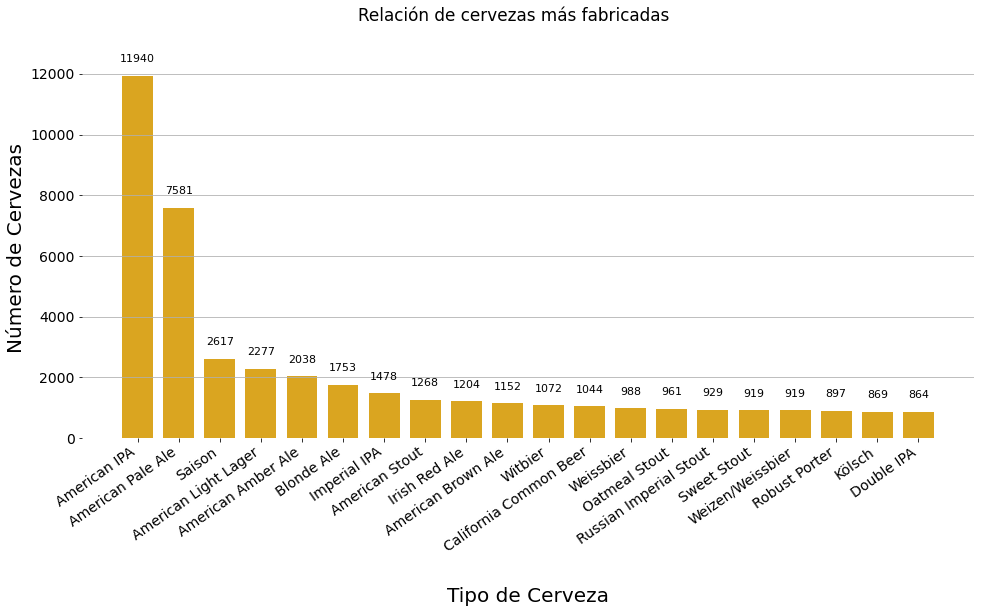

In [11]:
beer_total_df=beer_df.groupby(['Style'], as_index=False)['BeerID'].agg('count')
beer_total_df.rename(columns={'BeerID': 'Total'}, inplace=True)
beer_total_df=beer_total_df.sort_values('Total',ascending=False)
beer_total_df=beer_total_df.iloc[:20,:]# Mostramos los 20 tipos de cervezas más comunes.

plot_beer_production(
    beer_total_df,
    title='Relación de cervezas más fabricadas',
    x_label='Tipo de Cerveza',
    y_label='Número de Cervezas'
);


## Ejercicio 2

En las cervezas de trigo (o Weissbier), ¿existe relación entre el amargor y su graduación?

* Como se trata de ver la relación que hay entre dos variables entiendo que la mejor opción es un diagrama de dispersión

In [7]:
def plot_x_y_beer(x,y):
    
    fig, ax = plt.subplots(figsize=(7, 7))

    y = y
    # Incluimos ruido para visualizar mejor los puntos.
    x = add_noise(x)

    ax.scatter(x=x, y=y, alpha=.5)

    # Eliminamos el marco.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # ax.set_xlim([0, 20])
    # ax.set_ylim([0, 20])

    ax.set_ylabel("Grado de amargor (IBU)")
    ax.set_xlabel("Grado de alcohol (ABV)")

    ## Mostramos la cuadricula.
    ax.grid(True)

    ## Ocultamos el marco.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Titulamos la figura.
    fig.suptitle('Relación entre grado amargor (IBU) y graduación de alcohol (ABV)  en las Weissbier');
    
    return fig, ax

In [8]:
def add_noise(array):
    # Creamos un array del mismo tamaño al introducido con números que oscilan entre -0.3 y 0.3.
    noise = np.random.uniform(low=-0.3, high=0.3, size=array.size)
    
    # Añadimos array al de entrada.
    return array + noise

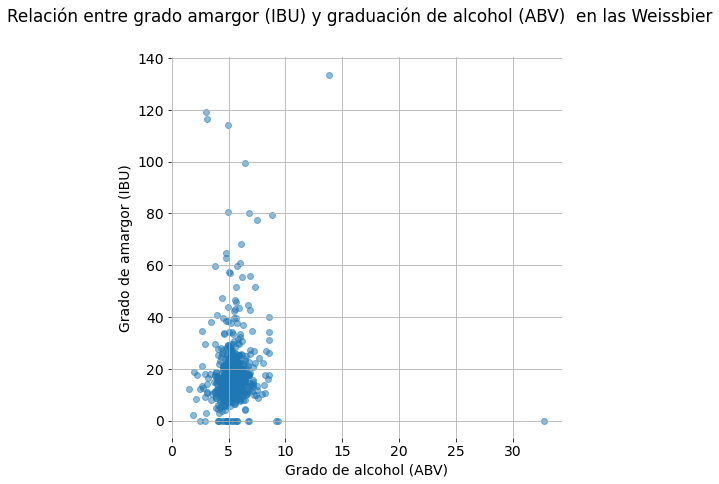

In [9]:
beer_df_weiss=beer_df[beer_df['Style']=='Weissbier'].reset_index()
beer_df_weiss_graduacion=beer_df_weiss['ABV']
beer_df_weiss_amargor=beer_df_weiss['IBU']
plot_x_y_beer(beer_df_weiss_graduacion,beer_df_weiss_amargor);

* Como observamos hay un oulier que nos distorsiona la visión. Procedemos a eliminarlo.

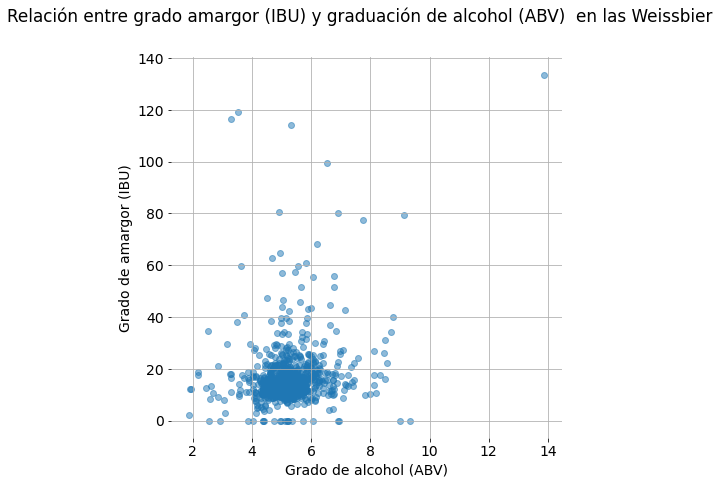

In [10]:
# Filtramos el outlier.
beer_df_weiss_filtration=beer_df_weiss[(beer_df_weiss['ABV'] < 30)]
beer_df_weiss_graduacion=beer_df_weiss_filtration['ABV']
beer_df_weiss_amargor=beer_df_weiss_filtration['IBU']
plot_x_y_beer(beer_df_weiss_graduacion,beer_df_weiss_amargor);

## Ejercicio 3

¿Cuáles son los estilos de cerveza más amargos? ¿Son todas las cervezas de esos estilos igual de amargas o hay mucha variabilidad?

* Considero que para visualizar esta información puede encajar una gráfica de violines ordenada por tipos de cervezas más amargas de media. Luego cada violin representa como se distribuye el grado amargor IBU

In [11]:
# Función que selecciona los indices IBU de la lista de cervezas que se le pasa como parámetro en beer_types 
def plot_ibu_distributions(df,beer_types,view_outliers=True):
    #Preparamos los datos
    # Instanciamos una lista con todas las cervezas de los distintos tipos que se pasan en la lista
    ibu_distribution= list()
    ibu_distributions= list()
    
    for beer_type in beer_types:
        ibu_distribution = df[(df['Style']==beer_type)].loc[:,'IBU']
        #Filtramos los outliers con la función de Tukey
        if (not view_outliers):
            index_outliers,values_ouliers=filtrar_outlier_tukey(ibu_distribution)
            ibu_distribution= ibu_distribution[~(ibu_distribution.isin(values_ouliers))]
            
        ibu_distributions.append(ibu_distribution) # Listas de listas. Cada lista son el IBU de las cervezas de un tipo.
    #Llamamos a la función que representa los datos.
    return plot_ibu_distribution(ibu_distributions,beer_types);


def filtrar_outlier_tukey(x):
    # Función que implementa Tukey para la eliminación de outliers
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1 
#     print("[q1=%f, q3=%f, iqr=%f]" % (q1, q3, iqr))
    
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
#     print("[floor=%f, ceiling=%f]" % (floor, ceiling))
    
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values



def plot_ibu_distribution(data_lst,types):
    
    # Función que representa la distribución del indice de amaror IBU por cada tipo de cerveza que se le para en types.
    # La estructura de datos a pasar es una lista de listas data_lst.
    
    fig, ax = plt.subplots(figsize=(14, 6))

    # Representamos los violines.
    ax.violinplot(data_lst)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_xticks(range(1,len(types)+1, 1))
    ax.set_xticklabels(types,rotation=35, ha='right')

    ax.set_ylabel('Nivel de amargor (IBU)',fontsize=20)
    ax.set_xlabel('Tipos de Cervezas ',fontsize=20,labelpad=30)
    ax.set_title('Uniformidad del amargor IBU en los distintos tipos de Cervezas ');
    
    return fig, ax


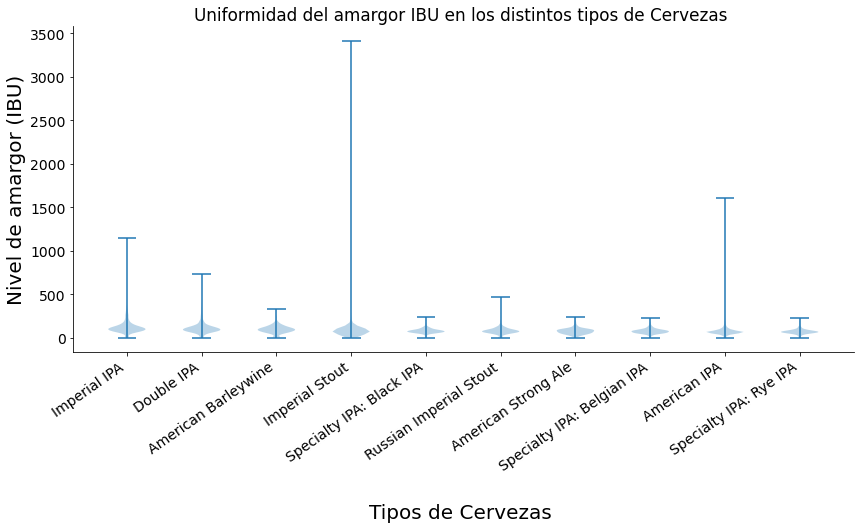

In [12]:
#Calculamos la media para sacar las más amargas y luego la desviación típica std para ver el grado de variación.
beer_ibu_df=beer_df.groupby(['Style'], as_index=False)['IBU'].agg(['mean','std'])
#Ordenamos por la media de mayor a menor
beer_ibu_df=beer_ibu_df.sort_values('mean',ascending=False)
# Seleccionamos las n más amargas
beer_types=beer_ibu_df.iloc[:10,:].index# Mostramos los 20 tipos de cervezas más amargas
#Representamos los datos
plot_ibu_distributions(beer_df,beer_types);

* Como los outliers nos distorsionan bastante la gráfica y no dejan visualizar de forma clara la distribución del amargor IBU, procedemos a eliminar los outliers de cada uno de los tipos de cerveza. Para ello activaremos el parámetro de que no queremos visualizar los ouliers en la gráfica.

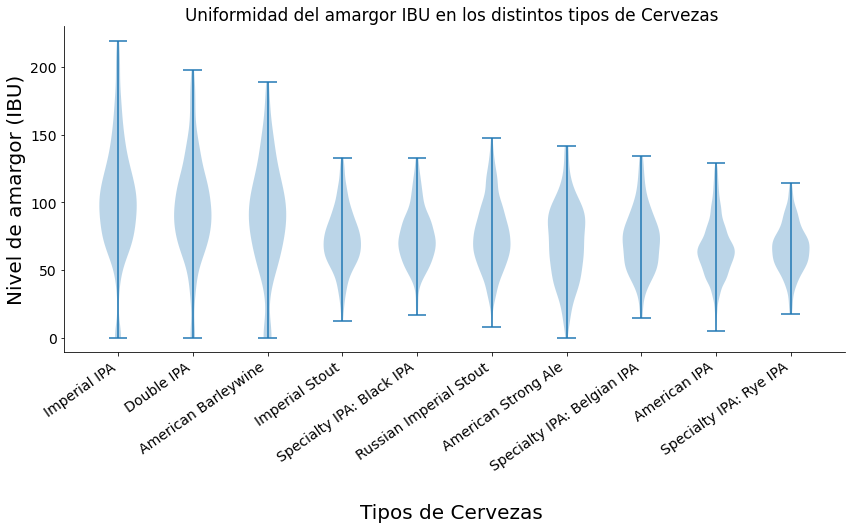

In [13]:
#Representamos los datos
plot_ibu_distributions(beer_df,beer_types,view_outliers=False);

# Segunda parte: StackOverflow

Para la segunda parte del *Challenge*, un dataset que almacena preguntas realizadas en StackOverflow, la fecha y un conjunto de etiquetas. [DataSet](https://www.kaggle.com/imoore/60k-stack-overflow-questions-with-quality-rate).

In [14]:
# El CSV está en formato 'latin-1', así que habrá que importarlo de la siguiente manera:
stack_ov_df = pd.read_csv("./stack.csv", encoding='latin-1')

In [15]:
stack_ov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            45000 non-null  int64 
 1   Title         45000 non-null  object
 2   Body          45000 non-null  object
 3   Tags          45000 non-null  object
 4   CreationDate  45000 non-null  object
 5   Y             45000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [16]:
stack_ov_df.sample(5)

,Id,Title,Body,Tags,CreationDate,Y
17896,42631728,User-Specific Workspace Settings in VS Code,<p>Working on a Python project and I want to d...,<visual-studio-code>,2017-03-06 17:19:26,HQ
41358,56984488,Counting Duplicate Row in Itab,"ABAP Friends,\r\nI need to count the number of...",<abap>,2019-07-11 08:09:48,LQ_EDIT
15246,41415234,Syntaxe in spark and scala,"<p>I'm an amateur in spark and scala, can anyo...",<scala><apache-spark>,2017-01-01 11:52:44,LQ_CLOSE
26044,46784052,How to receive cloudkit notifications about ch...,<p>I have two icloud accounts (<strong>A</stro...,<ios><swift><push-notification><cloudkit>,2017-10-17 06:46:49,HQ
37252,53732220,Angular Materials 7.1.1 not working with Angul...,I am using the latest versions of Angular Mate...,<angular><angular-material>,2018-12-11 20:55:35,LQ_EDIT


## Ejercicio 4

¿Sigue aumentando la popularidad de StackOverflow o ha comenzado a descender?

* Como lo que pretendemos es ver la tendencia de la popularidad de Stack Overflow en el tiempo optamos por una serie temporal individual

In [17]:
def plot_stk_ovr_popularity (df):
    
    # Agrupamos los valores por año para reducir el número de puntos y suavizar un poco la gráfica.
    # Además de esta forma ya que lo que se nos solicita es una tendencia temporal se ve más clara.
    df = df.groupby(pd.Grouper(freq='Y'))['Id'].count()

    # Obtenemos X e Y.
    x = df.index
    y = df.values

    fig, ax = plt.subplots(figsize=(16, 7))

    # Representamos el gráfico de dispersión conectado.
    ax.plot(x, y, marker='o', linewidth=2, markersize=7)

    # Etiquetamos la figura.
    fig.suptitle('Evolución de las consultas en Stack Overflow')
    ax.set_ylabel('Número de consultas')


    ## Mostramos la cuadricula.
    ax.grid(True)#, axis='y')

    ## Ocultamos el marco.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    return fig, ax

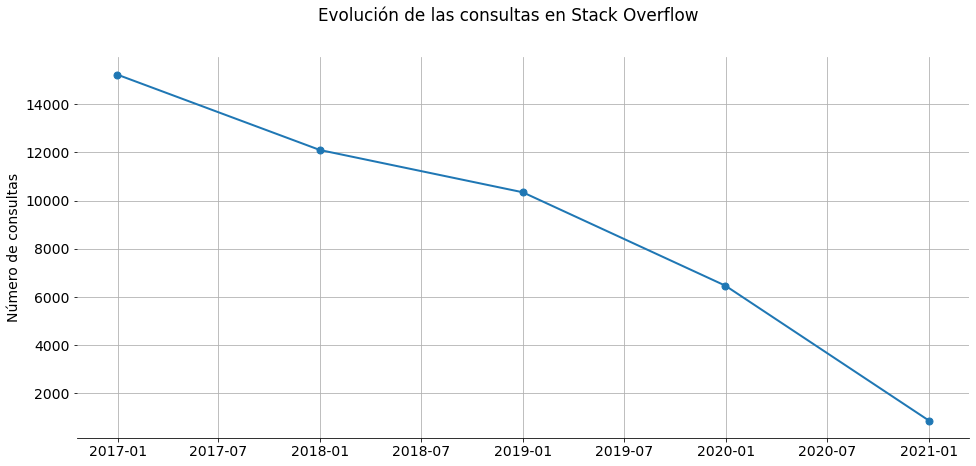

In [18]:
# Creamos un campo fecha para poder consultar los datos de forma más optima y poder agrupar por periodos de tiempo.
stack_ov_dt_df = stack_ov_df.copy()
stack_ov_dt_df['CreationDate'] = pd.to_datetime(stack_ov_dt_df['CreationDate'], format='%Y-%m-%d %H:%M:%S')
stack_ov_dt_df=stack_ov_dt_df.set_index('CreationDate',drop=True)
plot_stk_ovr_popularity(stack_ov_dt_df);

## Ejercicio 5

¿Existe alguna relación entre la tendencia de Python y de R que pudiera deberse a que los usuarios van de un lenguaje a otro?

* En este caso queremos mostrar como es la tendencia de dos variables en este caso el número de consultas Python y de R en Stack Overflow y que nos dará una idea de la tendencia de uso ambos lenguajes.

In [19]:
def plot_programming_languaje_comparative(df,prog_lang_lst):

    fig, ax = plt.subplots(figsize=(15, 7))
    
    for language in prog_lang_lst:
        plot_programming_languaje(df,ax, language)

    ax.legend()

    # Etiquetamos la figura
    fig.suptitle('Evolución de los lenguajes de programación')
    ax.set_ylabel('Número de consultas')

    ## Mostramos la cuadricula.
    ax.grid(True, axis='y')

    ## Ocultamos el marco.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    return fig,ax


In [20]:
def plot_programming_languaje(df,ax, prog_lang):
    
    #Filtramos el lenguaje de programación
    language = '<'+str.lower(prog_lang)+'>'
    df = df[df['Tags'].str.contains(language)]
#     print(stack_ov_lang_df)

    #Agregamos las consultas por mes
    df = df.groupby(pd.Grouper(freq='M'))['Id'].count()

    # Obtenemos X e Y.
    x = df.index
    y = df.values

    ax.plot(x, y, label=prog_lang,linewidth=3)

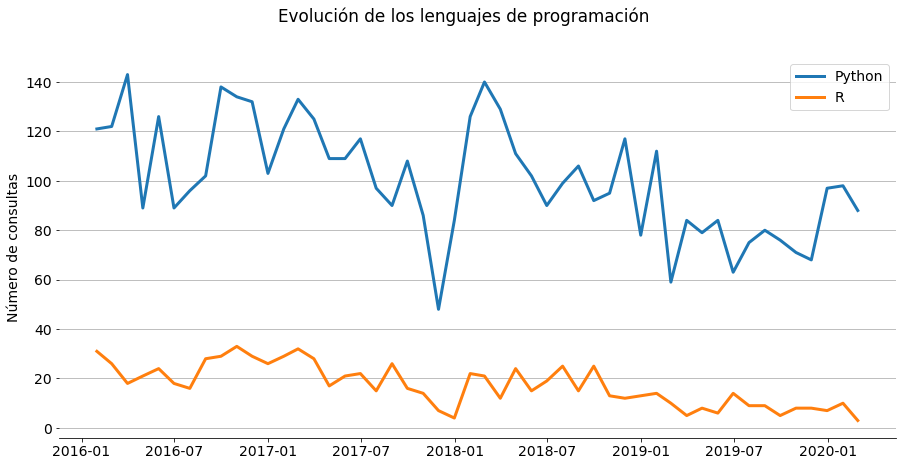

In [21]:
# Tiene como parámetro de entrada el dataframe y una lista con los luenguajes que queremos comparar.
# En este caos Python y R pero admite muchos más
plot_programming_languaje_comparative(stack_ov_dt_df,['Python','R']);

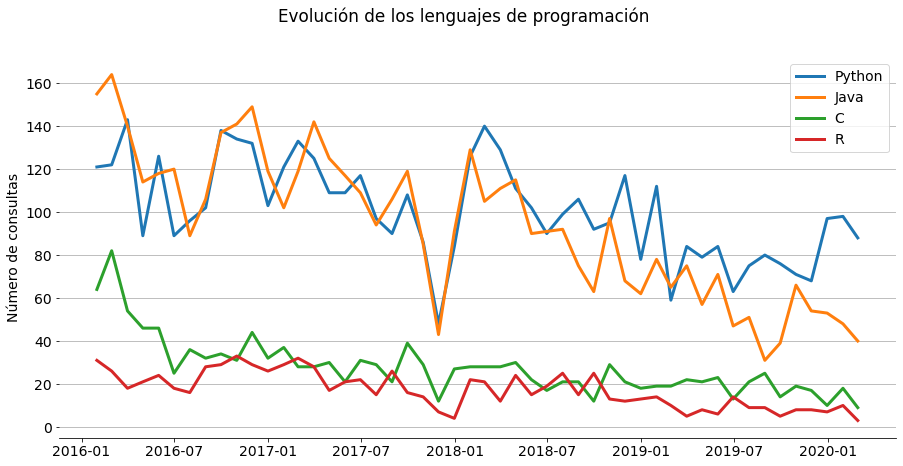

In [22]:
# Tiene como parámetro de entrada el dataframe y una lista con los luenguajes que queremos comparar.
# En este caos Python y R pero admite muchos más
plot_programming_languaje_comparative(stack_ov_dt_df,['Python','Java','C','R']);